In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import string
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [2]:

df_true = pd.read_csv("train_lstm.csv")


In [3]:
df_true.shape

(15999, 2)

In [4]:
df_true.columns

Index(['আমি অপমানিত বোধ করি।', 'sadness'], dtype='object')

In [5]:

df_fake = pd.read_csv("test_lstm.csv")
#df_fake=df_fake[["title","text","subject","date"]]


In [6]:
df_fake.head(10)

,আমি বরং পচা বোধ করছি তাই আমি এখন খুব উচ্চাভিলাষী নই।,sadness
0,আমি আমার ব্লগ আপডেট করছি কারণ আমি খারাপ বোধ করছি,sadness
1,আমি কখনই তাকে আমার থেকে আলাদা করি না কারণ আমি ...,sadness
2,আমি আমার হাতের নিচে লাল এবং হলুদ টিউলিপের তোড়...,joy
3,আমি যখন এটি করেছি তখন আমি কিছুটা নিরর্থক বোধ ক...,sadness
4,আমি এমন কোন দোকানে যেতে পারি না যেখানে আমি অস্...,fear
5,একটা টেলিফোন কল শেষে রাগ অনুভব করলাম,anger
6,আমি ব্যাখ্যা করি কেন আমি এমন একটি ছেলের সাথে এ...,joy
7,আমি পরবর্তী কি ঘটবে তা দেখতে আগ্রহী একজন পাঠকে...,joy
8,আমি ঠাট্টা বোধ করি আমি বিরক্তিকর ক্লান্ত বোধ ক...,anger
9,আমি বিশেষভাবে উত্তেজিত বোধ করি না,fear


In [7]:
df_fake.columns

Index(['আমি বরং পচা বোধ করছি তাই আমি এখন খুব উচ্চাভিলাষী নই।', 'sadness'], dtype='object')

In [8]:
df_fake.shape

(1999, 2)

In [9]:
df_true.head(10)

,আমি অপমানিত বোধ করি।,sadness
0,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,sadness
1,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,anger
2,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছ...,love
3,আমি অস্থির বোধ করছি।,anger
4,আমি ইদানীং কিছুটা বোঝা বোধ করছি কেন তা ছিল তা ...,sadness
5,আমি নিচ্ছি বা মিলিগ্রাম বা বার বার প্রস্তাবিত ...,surprise
6,আমি একজন কিশোর হিসাবে জীবন সম্পর্কে বিভ্রান্ত ...,fear
7,আমি বছরের পর বছর ধরে পেট্রোনাসের সাথে আছি আমি ...,joy
8,আমিও রোমান্টিক বোধ করি,love
9,আমি মনে করি যে আমি কিছু একটা দেখছি সেই কষ্টটা ...,sadness


In [10]:
df_fake["class"] = 0
df_true["class"] = 1

In [11]:
df_fake.shape, df_true.shape
df_fake_manual_testing = df_fake.tail(10)

for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
df_true_manual_testing = df_true.tail(10)

for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)
    df_fake.shape, df_true.shape

KeyError: '[23480] not found in axis'

In [12]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1
df_fake_manual_testing.head(10)
df_true_manual_testing.head(10)
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.head()

<ipython-input-12-bf30a0be4cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0


NameError: name 'df_true_manual_testing' is not defined

In [13]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)
df_marge.columns

Index(['আমি বরং পচা বোধ করছি তাই আমি এখন খুব উচ্চাভিলাষী নই।', 'sadness',
       'class', 'আমি অপমানিত বোধ করি।'],
      dtype='object')

In [14]:
df = df_marge.drop(["title", "subject","date"], axis = 1)
df.isnull().sum()

KeyError: "['title' 'subject' 'date'] not found in axis"

In [15]:
df = df.sample(frac = 1)
df.head()
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.columns
df.head()

NameError: name 'df' is not defined

### punctuation / special remove

In [16]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text
df["text"] = df["text"].apply(wordopt)

NameError: name 'df' is not defined

# Tokenization

In [18]:
import re

def tokenize(txt):
    tokens = re.split('\W+',txt)  # w = word character  # W = non word character
    return tokens
df['msg_clean_tokenized'] = df['text'].apply(lambda x: tokenize(x.lower()))

df.head()

,text,class,msg_clean_tokenized
0,here s an excerpt from the advocate a louisia...,0,"[here, s, an, excerpt, from, the, advocate, a,..."
1,comey lied and has been caught in his lie what...,0,"[comey, lied, and, has, been, caught, in, his,..."
2,century wire says in typical ndaa signing fas...,0,"[, century, wire, says, in, typical, ndaa, sig..."
3,this pastor s church should be heavily taxed f...,0,"[this, pastor, s, church, should, be, heavily,..."
4,san francisco reuters the most consequenti...,1,"[san, francisco, reuters, the, most, consequen..."


In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [19]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')  
stopwords[0:50]

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\hossa/nltk_data'
    - 'C:\\Users\\hossa\\anaconda3\\nltk_data'
    - 'C:\\Users\\hossa\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\hossa\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\hossa\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean
df['msg_no_sw'] = df['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

# stemming

In [ ]:
#import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df'msg_stemmed'] = df'msg_no_sw'].apply(lambda x: stemming(x))

# Level encoder

In [ ]:
# Level encoder
# label

le = LabelEncoder()
le.fit(data.Tag)
encoded_labels = le.transform(data.Tag)

labels = np.array(encoded_labels)
class_names = le.classes_

print(labels[:10])

In [18]:
x = df["text"]
y = df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
vectorization = TfidfVectorizer(max_features = 100000,ngram_range=(1,3), tokenizer=lambda x:x.split())
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
xv_train.shape
xv_test.shape

In [79]:
"""
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
"""

'\nvectorization = TfidfVectorizer()\nxv_train = vectorization.fit_transform(x_train)\nxv_test = vectorization.transform(x_test)\n'

In [20]:
model_acc=[]
model_precision=[]
model_recal=[]
model_f1=[]
model_nam=[]
model_confusion=[]

#Apply Different Model

 1. Decision Tree Classification

In [21]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

y_pred=DT.predict(xv_test)
score=accuracy_score(y_test,y_pred)

model_precision.append(precision_score(y_test,y_pred,average='weighted'))
model_recal.append(recall_score(y_test,y_pred,average='weighted'))
model_f1.append(f1_score(y_test,y_pred,average='weighted'))
print(f'Accuracy: {round(score*100,2)}%')
model_acc.append(score)
model_nam.append("Decision Tree")


Accuracy: 99.76%


<AxesSubplot:>

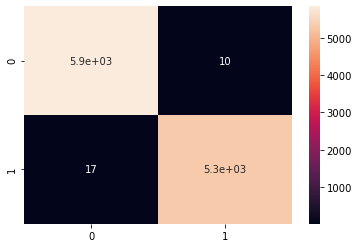

In [22]:

dtcm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(dtcm,annot=True)

In [23]:
y_pred=DT.predict(xv_train)
print(accuracy_score(y_train,y_pred))

0.9999703034982479


In [24]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5861
           1       1.00      1.00      1.00      5364

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



 2. Gradient Boosting Classifier

In [25]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)
y_pred=GBC.predict(xv_test)
score=accuracy_score(y_test,y_pred)
model_precision.append(precision_score(y_test,y_pred,average='weighted'))
model_recal.append(recall_score(y_test,y_pred,average='weighted'))
model_f1.append(f1_score(y_test,y_pred,average='weighted'))
print(f'Accuracy: {round(score*100,2)}%')
model_acc.append(score)
model_nam.append("Gradient Boosting")
confusion_matrix(y_test,y_pred, labels=[0,1])


Accuracy: 99.67%


array([[5835,   26],
       [  11, 5353]], dtype=int64)

<AxesSubplot:>

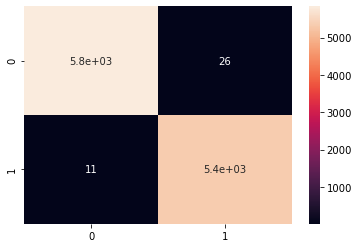

In [26]:
gbccm=confusion_matrix(y_test,pred_gbc)
import seaborn as sns
sns.heatmap(gbccm,annot=True)

In [27]:
y_pred=GBC.predict(xv_train)
print(accuracy_score(y_train,y_pred))

0.9984854784106433


In [28]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5861
           1       1.00      1.00      1.00      5364

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



 3. Random Forest Classifier

In [29]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)
y_pred=RFC.predict(xv_test)
score=accuracy_score(y_test,y_pred)
model_precision.append(precision_score(y_test,y_pred,average='weighted'))
model_recal.append(recall_score(y_test,y_pred,average='weighted'))
model_f1.append(f1_score(y_test,y_pred,average='weighted'))
print(f'Accuracy: {round(score*100,2)}%')
model_acc.append(score)
model_nam.append("Random Forest")
confusion_matrix(y_test,y_pred, labels=[0,1])

Accuracy: 99.24%


array([[5810,   51],
       [  34, 5330]], dtype=int64)

<AxesSubplot:>

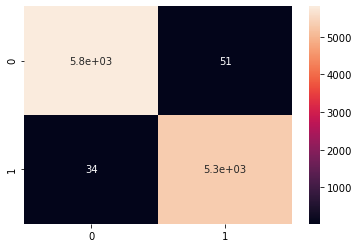

In [30]:
rfcccm=confusion_matrix(y_test,pred_rfc)
import seaborn as sns
sns.heatmap(rfcccm,annot=True)

In [31]:
y_pred=RFC.predict(xv_train)
print(accuracy_score(y_train,y_pred))

0.9999703034982479


In [32]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5364

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



4. Support Vector Machine Classifier

In [33]:
svc = SVC(kernel='linear', random_state=2)
svc.fit(xv_train, y_train)
pred_svc = svc.predict(xv_test)
svc.score(xv_test, y_test)
y_pred=svc.predict(xv_test)
score=accuracy_score(y_test,y_pred)
model_precision.append(precision_score(y_test,y_pred,average='weighted'))
model_recal.append(recall_score(y_test,y_pred,average='weighted'))
model_f1.append(f1_score(y_test,y_pred,average='weighted'))
print(f'Accuracy: {round(score*100,2)}%')
model_acc.append(score)
model_nam.append("SVC")
accu=confusion_matrix(y_test,y_pred, labels=[0,1])
model_confusion.append(accu)
model_confusion.append("SVC")
confusion_matrix(y_test,y_pred, labels=[0,1])





Accuracy: 99.55%


array([[5831,   30],
       [  21, 5343]], dtype=int64)

<AxesSubplot:>

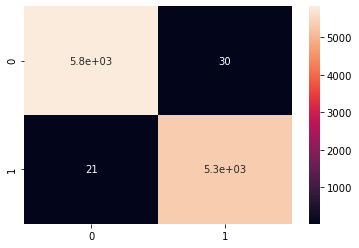

In [34]:
svccm=confusion_matrix(y_test,pred_svc)
import seaborn as sns
sns.heatmap(svccm,annot=True)

In [35]:
y_pred=svc.predict(xv_train)
print(accuracy_score(y_train,y_pred))

0.9992575874561976


5.Logistic Regression Classifier

In [36]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5861
           1       1.00      1.00      1.00      5364

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [37]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)
y_pred=LR.predict(xv_test)
score=accuracy_score(y_test,y_pred)
model_precision.append(precision_score(y_test,y_pred,average='weighted'))
model_recal.append(recall_score(y_test,y_pred,average='weighted'))
model_f1.append(f1_score(y_test,y_pred,average='weighted'))
model_acc.append(score)
model_nam.append("Logistic Regression")
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test,y_pred, labels=[0,1])

Accuracy: 98.95%


array([[5790,   71],
       [  47, 5317]], dtype=int64)

<AxesSubplot:>

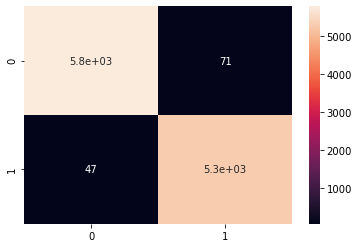

In [38]:
lrcm=confusion_matrix(y_test,pred_lr)
import seaborn as sns
sns.heatmap(lrcm,annot=True)

In [39]:
y_pred=LR.predict(xv_train)
print(accuracy_score(y_train,y_pred))

0.9932291976005226


In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5364

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



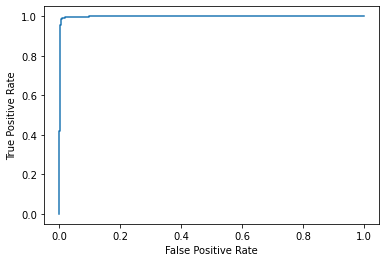

In [41]:
y_pred_proba = LR.predict_proba(xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

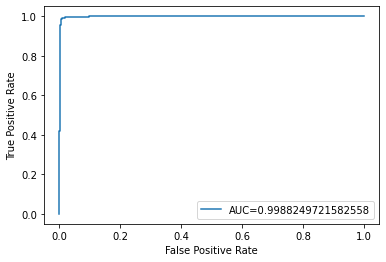

In [42]:

y_pred_proba = LR.predict_proba(xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

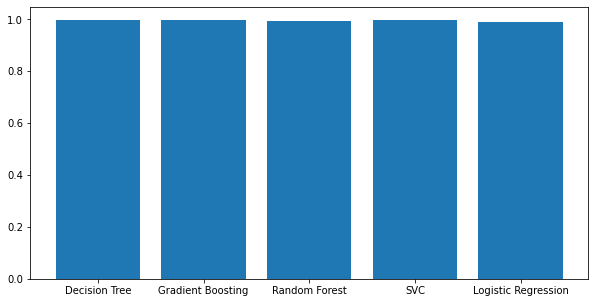

In [43]:
plt.figure(figsize=(10,5))
plt.bar(model_nam,model_acc)
plt.show()

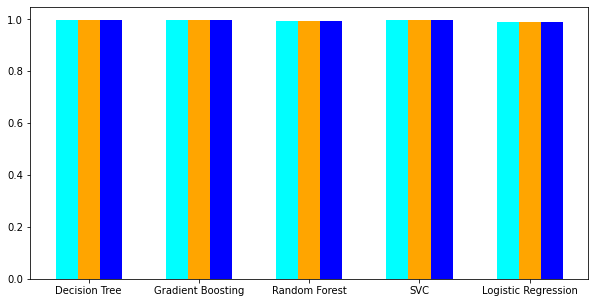

In [44]:
x = np.arange(len(model_precision))
w = .2

plt.figure(figsize=(10,5)) 
plt.bar(x -.2,model_precision,w,color='cyan')
plt.bar(x,model_recal,w,color='orange')
plt.bar(x+.2,model_f1,w,color='blue')
plt.xticks(x,model_nam)
plt.show()

In [45]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    pred_DT  = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_SVC = svc.predict(new_xv_test)
    pred_LR  = LR.predict(new_xv_test)

    return print("\n \nDT Prediction : {} \nGBC Prediction: {} \nRFC Prediction: {} \nSVC Prediction: {} \nLR Prediction : {}".format(output_lable(pred_DT[0]),output_lable(pred_GBC[0]),output_lable(pred_RFC[0]) ,output_lable(pred_SVC[0]),output_lable(pred_LR[0])))
   
    

 Model Testing 



In [ ]:
news = str(input())
manual_testing(news)